# Training a Deep Neural Network
The following code implements a deep neural network of 2 hidden layers with backpropagation using low-level libraries and compares it with a model generated by Scikit-learn.

## 1 Data Loading & Cleaning
The data set contains credit card debt information about 10,000 customers and whether they defaulted or not.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the data
df = pd.read_csv('Default.csv')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
# Scaling and converting to NumPy arrays
df['default']=df['default'].apply(lambda x: 0 if x=='No' else 1)
df['student']=df['student'].apply(lambda x: 0 if x=='No' else 1)

In [4]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [6]:
scaler = StandardScaler()
df[['balance','income']] = scaler.fit_transform(df[['balance','income']])
df

,default,student,balance,income
0,0,0,-0.218835,0.813187
1,0,1,-0.037616,-1.605496
2,0,0,0.492410,-0.131212
3,0,0,-0.632893,0.164031
4,0,0,-0.102791,0.370915
...,...,...,...,...
9995,0,0,-0.255990,1.460366
9996,0,0,-0.160044,-1.039014
9997,0,0,0.020751,1.883565
9998,0,0,1.516742,0.236363


In [7]:
Y = df['default'].to_numpy().reshape(-1,1)
X = df.drop(columns=['default']).to_numpy()

In [8]:
print("Shape of Y:",Y.shape)
print("Shape of X:",X.shape)

Shape of Y: (10000, 1)
Shape of X: (10000, 3)


In [9]:
X = X.T
Y = Y.T

print("Shape of Y:",Y.shape)
print("Shape of X:",X.shape)

Shape of Y: (1, 10000)
Shape of X: (3, 10000)


## 2 Training a Deep Neural Network Using Scikit-learn
The following code trains a deep neural network of 2 hidden layers with 4 neurons in each hidden layer using scikit-learn.

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
m = Y.shape[1]
mlp = MLPClassifier(hidden_layer_sizes=(4,4),activation='tanh',solver='sgd',alpha=0,learning_rate_init=0.01,max_iter=2000,batch_size=m,shuffle=False,momentum=0,verbose=True)
mlp.fit(X.T,Y.T)

/home/allen/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.77699467
Iteration 2, loss = 0.77127488
Iteration 3, loss = 0.76560155
Iteration 4, loss = 0.75997452
Iteration 5, loss = 0.75439366
Iteration 6, loss = 0.74885881
Iteration 7, loss = 0.74336984
Iteration 8, loss = 0.73792658
Iteration 9, loss = 0.73252887
Iteration 10, loss = 0.72717657
Iteration 11, loss = 0.72186949
Iteration 12, loss = 0.71660747
Iteration 13, loss = 0.71139034
Iteration 14, loss = 0.70621792
Iteration 15, loss = 0.70109002
Iteration 16, loss = 0.69600648
Iteration 17, loss = 0.69096709
Iteration 18, loss = 0.68597168
Iteration 19, loss = 0.68102003
Iteration 20, loss = 0.67611196
Iteration 21, loss = 0.67124727
Iteration 22, loss = 0.66642574
Iteration 23, loss = 0.66164718
Iteration 24, loss = 0.65691137
Iteration 25, loss = 0.65221810
Iteration 26, loss = 0.64756714
Iteration 27, loss = 0.64295829
Iteration 28, loss = 0.63839131
Iteration 29, loss = 0.63386599
Iteration 30, loss = 0.62938209
Iteration 31, loss = 0.62493938
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0, batch_size=10000,
              hidden_layer_sizes=(4, 4), learning_rate_init=0.01, max_iter=2000,
              momentum=0, shuffle=False, solver='sgd', verbose=True)

In [12]:
print("\nWeights and biases")
print("W1:",mlp.coefs_[0].T)
print("b1:",mlp.intercepts_[0].reshape(-1,1))
print("W2:",mlp.coefs_[1].T)
print("b2:",mlp.intercepts_[1].reshape(-1,1))
print("W3:",mlp.coefs_[2].T)
print("b3:",mlp.intercepts_[2].reshape(-1,1))


Weights and biases
W1: [[-0.16905105  0.49850713 -0.75603018]
 [ 0.53120166  0.07185733 -0.07866865]
 [ 0.38506698  0.63479874  0.70192537]
 [ 0.40849687  0.28333679  0.4195484 ]]
b1: [[ 0.65264976]
 [-0.26108415]
 [ 0.60626433]
 [ 0.75449845]]
W2: [[ 0.24677249 -0.70763733  0.33229445 -0.67727186]
 [-0.13311203  0.87323899  0.68842082  0.0540427 ]
 [-0.73199369 -0.36985573 -0.5191542  -0.41344406]
 [-0.01479345 -0.25828787 -0.43335966 -0.85312403]]
b2: [[ 0.67948802]
 [-0.99871148]
 [-0.63788959]
 [-0.75277169]]
W3: [[-0.44145447  0.74204117  0.74567222  1.42869179]]
b3: [[0.03478877]]


## 3 Training a Deep Neural Network Using Backpropagation
The following code implements backpropagation to train a deep neural network of 2 hidden layers with 4 neurons in each hidden layer.

In [13]:
# Initialising the paramaters of the neural network with Xavier initialisation
W = [np.random.randn(4,3)*np.sqrt(1/3),np.random.randn(4,4)*np.sqrt(1/4),np.random.randn(1,4)*np.sqrt(1/4)]
b = [np.zeros((4,1)),np.zeros((4,1)),np.zeros((1,1))]

In [14]:
# Updating parameters using gradient descent
iter = 402
lr = 0.01
loss = np.array([])
L = 3

for i in np.arange(iter):
    # Forward propagation
    Z = []
    A = []
    for l in np.arange(L):
        Z.append(W[l]@A[l-1]+b[l] if l> 0 else W[l]@X+b[l])
        A.append(1/(1+np.exp(-Z[l])) if l==L-1 else np.tanh(Z[l]))

    # Back propagation
    dZ = [0]*L
    dA = [0]*L
    dW = [0]*L
    db = [0]*L
    
    for l in np.arange(L-1,-1,-1):
        dZ[l] = A[l]-Y if l==L-1 else dA[l]*(1-np.tanh(Z[l])**2)
        dA[l-1] = W[l].T@dZ[l] if l> 0 else 0
        dW[l] = 1/m*dZ[l]@A[l-1].T if l>0 else 1/m*dZ[l]@X.T
        db[l] = 1/m*np.sum(dZ[l],axis=1,keepdims=True)
        W[l] -= lr*dW[l]
        b[l] -= lr*db[l]

    current_loss = -1/m*(Y@np.log(A[L-1]).T+(1-Y)@np.log(1-A[L-1]).T)
    loss = np.append(loss,current_loss)

print("Last iteration:",i+1)
print("Losses:",loss[-10:])

print("\nWeights and biases")
print("W1:",W[0])
print("b1:",b[0])
print("W2:",W[1])
print("b2:",b[1])
print("W3:",W[2])
print("b3:",b[2])

Last iteration: 402
Losses: [0.19007655 0.18985948 0.1896436  0.1894289  0.18921537 0.18900301
 0.18879179 0.18858172 0.18837279 0.18816499]

Weights and biases
W1: [[ 0.23225049  0.70235851 -0.60641509]
 [-0.84215143 -1.0047139  -0.69345399]
 [-0.58152449  0.32689847  0.91284491]
 [ 0.21799331  0.15903783  0.21828128]]
b1: [[-0.14280446]
 [-0.26534776]
 [-0.12652547]
 [ 0.31429823]]
W2: [[-0.33655407 -0.21378306 -0.34068044  0.07657408]
 [-0.11607443  0.22145416 -0.32453692 -0.42593727]
 [-0.18609074  0.21684395 -0.05565453 -0.38643371]
 [-0.26426254 -0.47198044 -0.35136714  0.51700934]]
b2: [[ 0.46182213]
 [-0.18407148]
 [ 0.10574289]
 [ 0.5555595 ]]
W3: [[-0.83802602  0.28875408 -0.17562209 -1.09307335]]
b3: [[-0.77906532]]


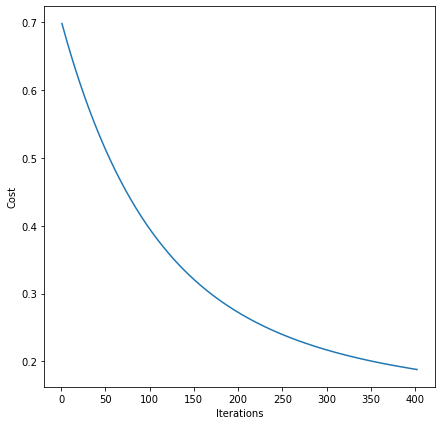

In [15]:
# Plotting the cost function against the number of iterations
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(iter)+1,loss)
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
fig.show()

### Using gradient checking to verify the custom implementation

In [16]:
# Creating the gradient vector of the cost function
dtheta = np.array([])
for l in range(L):
    dtheta = np.append(dtheta,dW[l].flatten())
    dtheta = np.append(dtheta,db[l].flatten())
dtheta

array([ 5.28414166e-03, -8.43529511e-03, -6.04443375e-03,  7.01436459e-03,
       -1.15402180e-02, -3.17387358e-03,  1.21086958e-05, -1.31220292e-02,
        5.36237556e-03, -8.30168294e-03,  2.40940731e-02,  6.08759732e-03,
        1.76472182e-02,  2.39591145e-02,  1.44864396e-02, -3.01126534e-02,
        1.73593553e-02, -5.86381416e-03,  1.29212013e-02, -8.97761378e-03,
       -5.95508749e-03,  2.57877441e-03, -6.57740769e-03,  4.65958516e-03,
        4.48420919e-03, -7.81764432e-04,  3.30740317e-03, -3.21764256e-03,
        1.75339285e-02, -1.18728215e-02,  1.71179299e-02, -9.13493086e-03,
       -4.33258887e-02,  2.07646327e-02, -1.33972165e-02, -4.76317081e-02,
        4.65066803e-02, -9.27794457e-03,  9.29245029e-03,  5.15747376e-02,
        7.85470592e-02])

In [17]:
# Creating a list of all parameters
P = b.copy()
for l in range(L):
    P.insert(2*l,W[l])

print(P)

[array([[ 0.23225049,  0.70235851, -0.60641509],
       [-0.84215143, -1.0047139 , -0.69345399],
       [-0.58152449,  0.32689847,  0.91284491],
       [ 0.21799331,  0.15903783,  0.21828128]]), array([[-0.14280446],
       [-0.26534776],
       [-0.12652547],
       [ 0.31429823]]), array([[-0.33655407, -0.21378306, -0.34068044,  0.07657408],
       [-0.11607443,  0.22145416, -0.32453692, -0.42593727],
       [-0.18609074,  0.21684395, -0.05565453, -0.38643371],
       [-0.26426254, -0.47198044, -0.35136714,  0.51700934]]), array([[ 0.46182213],
       [-0.18407148],
       [ 0.10574289],
       [ 0.5555595 ]]), array([[-0.83802602,  0.28875408, -0.17562209, -1.09307335]]), array([[-0.77906532]])]


In [18]:
# Defining a function to index an element in the list of parameters
def loc(index,P):
    i = 0
    for p in P:
        if index<p.size:
            return i,np.unravel_index(index,p.shape)
        else:
            index -= p.size
            i += 1

loc(10,P)

(0, (3, 1))

In [19]:
# Defining a function to calculate the partial derivative of the cost function with respect to a parameter

def partial(index,epsilon,X,Y,P,L):
    Q = P.copy()
    i = loc(index,Q)
    Q[i[0]][i[1]] += epsilon

    W = [Q[i] for i in range(0,L*2,2)]
    b = [Q[i] for i in range(1,L*2,2)]

    Z = []
    A = []
    for l in np.arange(L):
        Z.append(W[l]@A[l-1]+b[l] if l> 0 else W[l]@X+b[l])
        A.append(1/(1+np.exp(-Z[l])) if l==L-1 else np.tanh(Z[l]))
    
    U = -1/m*(Y@np.log(A[L-1]).T+(1-Y)@np.log(1-A[L-1]).T)

    Q[i[0]][i[1]] -= 2*epsilon
    
    W = [Q[i] for i in range(0,L*2,2)]
    b = [Q[i] for i in range(1,L*2,2)]

    Z = []
    A = []
    for l in np.arange(L):
        Z.append(W[l]@A[l-1]+b[l] if l> 0 else W[l]@X+b[l])
        A.append(1/(1+np.exp(-Z[l])) if l==L-1 else np.tanh(Z[l]))
    
    L = -1/m*(Y@np.log(A[L-1]).T+(1-Y)@np.log(1-A[L-1]).T)

    return (U-L)/(2*epsilon)

print(partial(10,1e-7,X,Y,P,L))

[[0.02404599]]


In [20]:
# Creating the approximate gradient vector of the cost function
dtheta_approx = np.array([])
for index in range(41):
    dtheta_approx = np.append(dtheta_approx,partial(index,1e-7,X,Y,P,L))

dtheta_approx

array([ 5.27320965e-03, -8.42551723e-03, -6.03798692e-03,  6.99271058e-03,
       -1.15054202e-02, -3.16608378e-03,  8.65876815e-06, -1.31064083e-02,
        5.35474179e-03, -8.27393390e-03,  2.40459948e-02,  6.07176642e-03,
        1.76037614e-02,  2.38845321e-02,  1.44422192e-02, -3.00144415e-02,
        1.73506544e-02, -5.86995827e-03,  1.29004678e-02, -8.95302971e-03,
       -5.95248781e-03,  2.57772872e-03, -6.56692922e-03,  4.65433053e-03,
        4.48411169e-03, -7.83445669e-04,  3.30328612e-03, -3.21390983e-03,
        1.75035220e-02, -1.18431456e-02,  1.70761334e-02, -9.11517972e-03,
       -4.31762530e-02,  2.07131318e-02, -1.33663720e-02, -4.74561676e-02,
        4.64186144e-02, -9.25931637e-03,  9.29023386e-03,  5.14646326e-02,
        7.83137726e-02])

In [21]:
G = np.linalg.norm(dtheta_approx - dtheta)/(np.linalg.norm(dtheta_approx) + np.linalg.norm(dtheta))
G

0.001398288651323276

In [22]:
dtheta_approx - dtheta

array([-1.09320164e-05,  9.77788376e-06,  6.44683739e-06, -2.16540161e-05,
        3.47977600e-05,  7.78979224e-06, -3.44992768e-06,  1.56208419e-05,
       -7.63377339e-06,  2.77490458e-05, -4.80782886e-05, -1.58308929e-05,
       -4.34568343e-05, -7.45823963e-05, -4.42204124e-05,  9.82118803e-05,
       -8.70090781e-06, -6.14410963e-06, -2.07335185e-05,  2.45840734e-05,
        2.59968673e-06, -1.04568191e-06,  1.04784664e-05, -5.25462907e-06,
       -9.74926656e-08, -1.68123771e-06, -4.11705541e-06,  3.73272688e-06,
       -3.04065566e-05,  2.96758804e-05, -4.17964888e-05,  1.97511414e-05,
        1.49635675e-04, -5.15008868e-05,  3.08444644e-05,  1.75540459e-04,
       -8.80658965e-05,  1.86281969e-05, -2.21643176e-06, -1.10105084e-04,
       -2.33286610e-04])

## 4 Conclusion
Similar values of loss from 2 & 3 for the same number of iterations indicates that the custom gradient descent implementation is correct. The weights and biases are different because the 2 models are randomly initialised during training and the loss function of the shallow neural network has multiple maximia and minima.